In [1]:
import os
import matplotlib
import sklearn
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from feature_engine.selection import SelectBySingleFeaturePerformance
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    PowerTransformer,
    FunctionTransformer
)
from feature_engine.encoding import (
	RareLabelEncoder,
    MeanEncoder,
    CountFrequencyEncoder
)
from feature_engine.datetime import DatetimeFeatures

In [2]:
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (11, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid')

In [3]:
PROJECT_DIR = 'R:\Jaydeep/Flight-Price-Prediction'
DATA_DIR = 'data'

TRAIN_DATASET_NAME = 'train'
VAL_DATASET_NAME = 'validation'
TEST_DATASET_NAME  = 'test'

TRAIN_PRE_DATASET_NAME = 'train_preprocessing'
VAL_PRE_DATASET_NAME = 'val_preprocessing'
TEST_PRE_DATASET_NAME = 'test_preprocessing'

def get_dataset(dataset_name):
    file_name = f'{dataset_name}.csv'
    file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    return pd.read_csv(file_path)


X_train = get_dataset(TRAIN_PRE_DATASET_NAME)
X_val = get_dataset(VAL_PRE_DATASET_NAME)
X_test = get_dataset(TEST_PRE_DATASET_NAME)

y_train = get_dataset(TRAIN_DATASET_NAME)['price']
y_val = get_dataset(VAL_DATASET_NAME)['price']
y_test = get_dataset(TEST_DATASET_NAME)['price']

In [4]:
X_train

,airline_transformer__airline_Air India,airline_transformer__airline_Indigo,airline_transformer__airline_Jet Airways,airline_transformer__airline_Multiple Carriers,airline_transformer__airline_other,date_transformer__date_of_journey_month,date_transformer__date_of_journey_day_of_week,date_transformer__date_of_journey_day_of_year,location_union_transformer__source,location_union_transformer__destination,...,location_union_transformer__destination_is_north,time_union_transformer__dep_time_hour,time_union_transformer__dep_time_minute,time_union_transformer__arrival_time_hour,time_union_transformer__arrival_time_minute,time_union_transformer__dep_time_part_of_day,time_union_transformer__arrival_time_part_of_day,duration_log_transformer__duration_minute,total_stops_trasformer__total_stops,total_stops_trasformer__is_direct_flight
0,0.0,0.0,0.0,1.0,0.0,0.666667,0.166667,0.686441,1.035780,1.034784,...,0,0.086957,0.272727,0.478261,0.909091,0.000000,0.397086,6.354370,1,0
1,0.0,1.0,0.0,0.0,0.0,0.666667,0.833333,0.661017,-0.938900,-1.828083,...,1,0.782609,1.000000,0.913043,0.909091,0.753754,1.000000,5.164786,0,1
2,0.0,1.0,0.0,0.0,0.0,1.000000,0.500000,0.822034,-0.166583,-0.173972,...,0,0.826087,0.636364,1.000000,0.272727,0.753754,1.000000,5.393628,1,0
3,0.0,0.0,1.0,0.0,0.0,0.666667,0.500000,0.584746,-0.938900,-1.828083,...,1,0.478261,0.181818,0.608696,0.090909,1.000000,0.397086,5.164786,0,1
4,0.0,0.0,0.0,1.0,0.0,0.000000,0.500000,0.169492,1.035780,1.034784,...,0,0.260870,0.000000,0.782609,0.909091,0.000000,1.000000,6.646391,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6688,0.0,0.0,1.0,0.0,0.0,1.000000,0.500000,0.822034,1.035780,1.034784,...,0,0.956522,0.909091,0.173913,0.454545,0.753754,0.000000,5.814131,1,0
6689,0.0,0.0,1.0,0.0,0.0,0.666667,0.666667,0.711864,-0.166583,-0.173972,...,0,0.695652,0.545455,0.173913,0.727273,0.753754,0.000000,6.593045,1,0
6690,0.0,0.0,1.0,0.0,0.0,0.666667,0.500000,0.584746,-0.166583,-0.173972,...,0,0.695652,0.545455,0.391304,0.363636,0.753754,0.397086,6.917706,1,0
6691,0.0,0.0,1.0,0.0,0.0,0.666667,0.666667,0.711864,-0.166583,-0.173972,...,0,0.739130,0.000000,1.000000,0.636364,0.753754,1.000000,5.978886,1,0


In [5]:
def get_metrics(model, X, y):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    print(f'R^2: {r2:.4f}')
    print(f'Adjusted R^2: {adj_r2:.4f}')
    print(f'RMSE: {rmse:.4f}')

In [6]:
def get_dict_metrics(model, X, y):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return {
         'R^2' : r2,
         'Adjusted R^2' : adj_r2,
         'RMSE' : rmse
    }

## BASE

In [7]:
dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(X_train, y_train)
get_metrics(dummy_regressor, X_val, y_val)

R^2: -0.0000
Adjusted R^2: -0.0127
RMSE: 4657.5561


## Model Building

In [8]:
models = [LinearRegression(), SVR(),  KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]

In [9]:
for model in models:
    model.fit(X_train, y_train)
    print(f'Model Name: {model}')
    get_metrics(model, X_val, y_val)
    print('=============================')

Model Name: LinearRegression()
R^2: 0.5728
Adjusted R^2: 0.5673
RMSE: 3044.2339
Model Name: SVR()
R^2: 0.0520
Adjusted R^2: 0.0400
RMSE: 4534.6868
Model Name: KNeighborsRegressor()
R^2: 0.6126
Adjusted R^2: 0.6077
RMSE: 2898.7151
Model Name: DecisionTreeRegressor()
R^2: 0.6581
Adjusted R^2: 0.6537
RMSE: 2723.3829
Model Name: RandomForestRegressor()
R^2: 0.7982
Adjusted R^2: 0.7956
RMSE: 2092.2519


## HyperParameter Tuning

In [10]:
# # Define the Random Forest model
# rf = RandomForestRegressor()

# # Define the hyperparameters to tune
# param_grid = {
#     'n_estimators': [50, 100, 150],  # Number of trees in the forest
#     'max_depth': [None, 10, 20],  # Maximum depth of the trees
#     'max_features' : [0.5, 0.7, 0.9]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                            cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# # Perform grid search
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_

# # Initialize a new Random Forest model with the best parameters
# best_rf = RandomForestRegressor(**best_params)

# # Fit the model to the entire training data
# best_rf.fit(X_train, y_train)

# print('==========BEST PARAMS==========')
# print(best_params)

# print()
# print('==========VALIDATION DATASET==========')
# get_metrics(best_rf, X_val, y_val)

# print()
# print('==========TEST DATASET==========')
# get_metrics(best_rf, X_test, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits

==========BEST PARAMS==========
{'max_depth': None, 'max_features': 0.5, 'n_estimators': 150}

==========VALIDATION DATASET==========
R^2: 0.8039
Adjusted R^2: 0.8014
RMSE: 2062.6755

==========TEST DATASET==========
R^2: 0.8015
Adjusted R^2: 0.7995
RMSE: 2021.7628


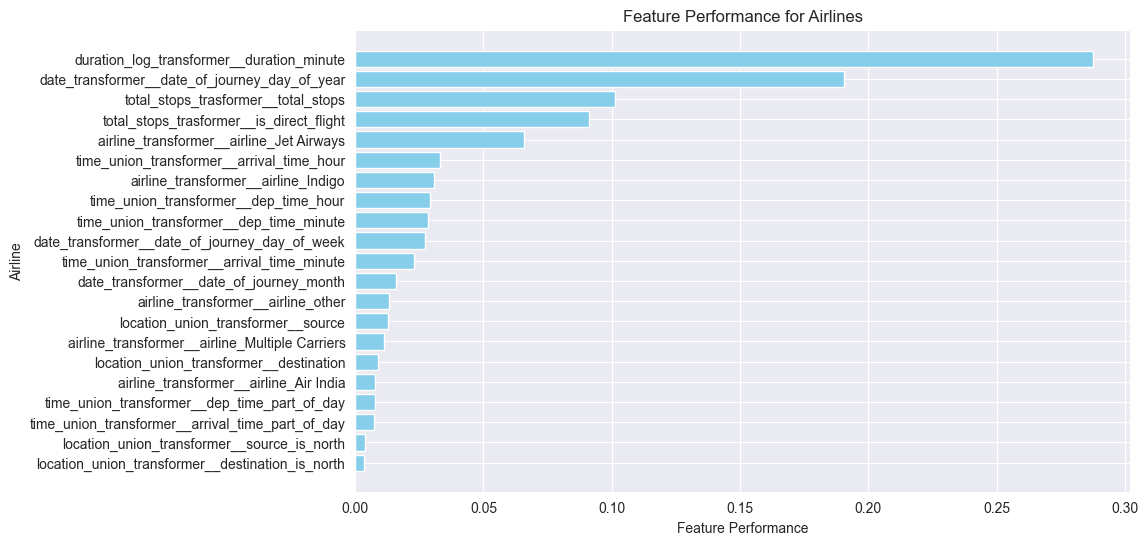

In [11]:
rf = RandomForestRegressor(max_depth=20, max_features=0.5, n_estimators=150)
rf.fit(X_train, y_train)

feature_imp_df = pd.DataFrame(
    {
        'feature_name' : rf.feature_names_in_,
        'importance': rf.feature_importances_
    }
).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_imp_df.feature_name, feature_imp_df.importance, color='skyblue')
plt.xlabel('Feature Performance')
plt.ylabel('Airline')
plt.title('Feature Performance for Airlines')
plt.gca().invert_yaxis()
plt.show()

## FINAL

In [12]:
airline_transformer = Pipeline(steps=[
    ('grouper', RareLabelEncoder(tol=0.1, replace_with='other', n_categories=2)),
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

date_tranformer = Pipeline(steps=[
    ('date_to_features', DatetimeFeatures(features_to_extract=['month', 'day_of_week', 'day_of_year'], yearfirst=True, format='mixed')),
    ('min_max_scaler', MinMaxScaler())
])

location_transformer = Pipeline(steps=[
    ('grouper', RareLabelEncoder(tol=0.1, replace_with='other', n_categories=2)),
    ('mean_encoder', MeanEncoder()),
    ('power_transformer', PowerTransformer())
])

def is_north(X):
	columns = X.columns.to_list()
	north_cities = {"Delhi", "Kolkata", "Mumbai", "New Delhi"}
	return (
		X
		.assign(**{
			f"{col}_is_north": X.loc[:, col].isin(north_cities).astype(int)
			for col in columns
		})
		.drop(columns=columns)
	)

location_union_transformer = FeatureUnion(transformer_list=[
	("location_transformer", location_transformer),
	("is_north_transformer", FunctionTransformer(func=is_north))
])

time_transformer = Pipeline(
    steps = [
        ('dt', DatetimeFeatures(features_to_extract=['hour', 'minute'],  yearfirst=True, format='mixed')),
        ('scaler', MinMaxScaler())
    ]
)

def part_of_day(X, start=0 , mid=8, end=16):
    columns = X.columns.to_list()
    X_temp = X.assign(
        **{
            col: pd.to_datetime(X.loc[:, col]).dt.hour
            for col in columns
        }
    )
    return (
        X_temp
        .assign(
            **{
                f'{col}_part_of_day': np.select(
                    [
                        X_temp.loc[:, col].between(start, mid, inclusive='left'),
                        X_temp.loc[:, col].between(mid, end, inclusive='left')
                    ], choicelist = ['start', 'mid'] ,default = 'end'
                )
                for col in columns
            }
        ).drop(columns=columns)
    )

part_of_day_transformer = Pipeline(
    steps = [
        ('part_of_day_func', FunctionTransformer(func=part_of_day)),
        ('count_fre_encoder', CountFrequencyEncoder()),
        ('min_max_scaler', MinMaxScaler())
    ]
)

time_union_transformer = FeatureUnion(
    transformer_list=[
        ('time_transformer', time_transformer),
        ('part_of_day_transformer', part_of_day_transformer)
    ]
)

duration_log_transformer = FunctionTransformer(func=np.log)

def is_direct_flight(X):
    return X.assign(
        is_direct_flight = X.total_stops.eq(0).astype(int)
    )

total_stops_transformer = FunctionTransformer(func=is_direct_flight)

column_transformer = ColumnTransformer(transformers=[
    ('airline_transformer', airline_transformer, ['airline']),
    ('date_transformer', date_tranformer, ['date_of_journey']),
    ('location_union_transformer', location_union_transformer, ['source', 'destination']),
    ('time_union_transformer', time_union_transformer, ['dep_time', 'arrival_time']),
    ('duration_log_transformer', duration_log_transformer, ['duration_minute']),
    ('total_stops_trasformer', total_stops_transformer, ['total_stops'])
])

In [13]:
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),  # ColumnTransformer
    ('random_forest_regressor', RandomForestRegressor(max_depth=20, max_features=0.5, n_estimators=150))  # RandomForestRegressor
])

In [14]:
X_train, y_train = get_dataset('train').drop(columns=['price','additional_info']), get_dataset('train').price.copy()
X_val, y_val = get_dataset('validation').drop(columns=['price','additional_info']), get_dataset('validation').price.copy()
X_test, y_test = get_dataset('test').drop(columns=['price','additional_info']), get_dataset('test').price.copy()

In [15]:
pipeline.fit(X_train, y_train)

print()
print('==========VALIDATION DATASET==========')
get_metrics(pipeline, X_val, y_val)

print()
print('==========TEST DATASET==========')
get_metrics(pipeline, X_test, y_test)


==========VALIDATION DATASET==========
R^2: 0.8083
Adjusted R^2: 0.8074
RMSE: 2039.1972

==========TEST DATASET==========
R^2: 0.8023
Adjusted R^2: 0.8015
RMSE: 2017.8958


In [16]:
X_train.head(1)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration_minute,total_stops
0,Multiple Carriers,2019-05-21,Delhi,Cochin,02:15:00,11:50:00,575,1


In [17]:
y_train.head(1).iloc[0]

14067

In [18]:
query = pd.DataFrame(
    {
            'airline': ['Multiple Carriers'],
            'date_of_journey': ['2019-05-21'],
            'source': ['Delhi'],
            'destination': ['Cochin'],
            'dep_time': ['02:15:00'],
            'arrival_time': ['11:50:00'],
            'duration_minute': [575],
            'total_stops': [1]
    }
)

print('===== OUTPUT =====>>>>', pipeline.predict(query)[0])

===== OUTPUT =====>>>> 12905.557681077695


In [19]:
# # Get input values
# airline = input("Enter airline: ")
# date_of_journey = input("Enter date of journey: ")
# source = input("Enter source: ")
# destination = input("Enter destination: ")
# dep_time = input("Enter departure time: ")
# arrival_time = input("Enter arrival time: ")
# duration_minute = int(input("Enter duration in minutes: "))
# total_stops = int(input("Enter total stops: "))

# # Create a dictionary with column names and input values
# data = {
#     'airline': [airline],
#     'date_of_journey': [date_of_journey],
#     'source': [source],
#     'destination': [destination],
#     'dep_time': [dep_time],
#     'arrival_time': [arrival_time],
#     'duration_minute': [duration_minute],
#     'total_stops': [total_stops]
# }

# query = pd.DataFrame(data)

# print()
# print('===== OUTPUT =====>>>>', pipeline.predict(query)[0])

In [20]:
import pickle

In [21]:
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [22]:
with open('trained_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [23]:
query = pd.DataFrame(
    {
            'airline': ['Multiple Carriers'],
            'date_of_journey': ['2019-05-21'],
            'source': ['Delhi'],
            'destination': ['Cochin'],
            'dep_time': ['02:15:00'],
            'arrival_time': ['11:50:00'],
            'duration_minute': [575],
            'total_stops': [1]
    }
)

print('===== OUTPUT =====>>>>', loaded_model.predict(query)[0])

===== OUTPUT =====>>>> 12905.557681077695


In [24]:
import os
import pickle

# Ensure the 'model' directory exists, create it if it doesn't
os.makedirs('../model', exist_ok=True)

# Save the model to the 'model' directory
model_path = '../model/trained_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(pipeline, file)